<a href="https://colab.research.google.com/github/ToluAbolude/Trading/blob/main/IB_Trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# !pip install yfinance
# !pip install pandas
# !pip install numpy

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np  

from pandas.tseries.offsets import DateOffset

In [18]:
vix_df = yf.download('^VIX')
print(vix_df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000       0
1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001       0
1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999       0
1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001       0
1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000       0
...               ...        ...        ...        ...        ...     ...
2022-05-12  33.740002  34.759998  31.700001  31.770000  31.770000       0
2022-05-13  31.090000  31.200001  28.780001  28.870001  28.870001       0
2022-05-16  30.010000  30.230000  27.360001  27.469999  27.469999       0
2022-05-17  27.070000  27.170000  25.510000  26.100000  26.100000       0
2022-05-18  26.740000  27.540001  26.209999

In [19]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

In [20]:
print(vix_df)

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000       0   
1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001       0   
1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999       0   
1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001       0   
1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000       0   
...               ...        ...        ...        ...        ...     ...   
2022-05-12  33.740002  34.759998  31.700001  31.770000  31.770000       0   
2022-05-13  31.090000  31.200001  28.780001  28.870001  28.870001       0   
2022-05-16  30.010000  30.230000  27.360001  27.469999  27.469999       0   
2022-05-17  27.070000  27.170000  25.510000  26.100000  26.100000       0   
2022-05-18  26.740000  27.540001  26.209999  27.540001  27.540001       0   

In [21]:
vix_df_filt = vix_df[vix_df.Close > 1.5 * vix_df.MA]

In [22]:
print(vix_df_filt)

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1990-08-06  35.910000  35.910000  35.910000  35.910000  35.910000       0   
1990-08-07  32.750000  32.750000  32.750000  32.750000  32.750000       0   
1994-04-04  23.610001  28.299999  23.610001  23.870001  23.870001       0   
1997-10-30  36.709999  38.560001  35.840000  38.200001  38.200001       0   
2001-09-17  43.200001  44.330002  39.770000  41.759998  41.759998       0   
...               ...        ...        ...        ...        ...     ...   
2020-03-19  80.620003  84.260002  68.570000  72.000000  72.000000       0   
2021-01-27  23.820000  37.209999  23.709999  37.209999  37.209999       0   
2021-11-26  26.620001  28.990000  23.879999  28.620001  28.620001       0   
2021-12-01  24.920000  32.610001  22.379999  31.120001  31.120001       0   
2022-01-25  32.290001  35.849998  29.129999  31.160000  31.160000       0   

In [28]:
series = pd.Series(vix_df_filt.index).diff()/np.timedelta64(1,'D') >= 30

In [29]:
series[0] = True

In [30]:
signals = vix_df_filt[series.values]

In [31]:
print(signals.shape)
print(signals)

(21, 7)
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1990-08-06  35.910000  35.910000  35.910000  35.910000  35.910000       0   
1994-04-04  23.610001  28.299999  23.610001  23.870001  23.870001       0   
1997-10-30  36.709999  38.560001  35.840000  38.200001  38.200001       0   
2001-09-17  43.200001  44.330002  39.770000  41.759998  41.759998       0   
2007-02-27  12.120000  19.010000  12.100000  18.309999  18.309999       0   
2008-09-17  31.959999  36.400002  30.250000  36.220001  36.220001       0   
2010-05-06  25.879999  40.709999  24.430000  32.799999  32.799999       0   
2011-08-04  24.570000  32.070000  24.309999  31.660000  31.660000       0   
2014-10-13  21.160000  24.639999  20.520000  24.639999  24.639999       0   
2014-12-16  23.549999  25.200001  19.600000  23.570000  23.570000       0   
2015-08-21  22.549999  28.379999  20.799999  28.030001  28.030001   

In [32]:
sp_df = yf.download('^GSPC', start = '1990-01-01')

[*********************100%***********************]  1 of 1 completed


In [33]:
print(sp_df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-05-12  3903.949951  3964.800049  3858.870117  3930.080078  3930.080078   
2022-05-13  3963.899902  4038.879883  3963.899902  4023.889893  4023.889893   
2022-05-16  4013.020020  4046.459961  3983.989990  4008.010010  4008.010010   
2022-05-17  4052.000000  4090.719971  4033.929932  4088.850098  4088.850098   
2022-05-18  4051.979980  4051.979980  4036.010010  4

In [38]:
test_ = sp_df[(sp_df.index >= signals.index[0]) & (sp_df.index <= signals.index[0] + DateOffset(months=6))]

In [39]:
print(test_)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-08-06  344.859985  344.859985  333.269989  334.429993  334.429993   
1990-08-07  334.429993  338.630005  332.220001  334.829987  334.829987   
1990-08-08  334.829987  339.209991  334.829987  338.350006  338.350006   
1990-08-09  338.350006  340.559998  337.559998  339.940002  339.940002   
1990-08-10  339.899994  339.899994  334.220001  335.519989  335.519989   
...                ...         ...         ...         ...         ...   
1991-01-31  340.920013  343.929993  340.470001  343.929993  343.929993   
1991-02-01  343.910004  344.899994  340.369995  343.049988  343.049988   
1991-02-04  343.049988  348.709991  342.959991  348.339996  348.339996   
1991-02-05  348.339996  351.839996  347.209991  351.260010  351.260010   
1991-02-06  351.260010  358.070007  349.579987  358.070007  358.070007   

               Volume  
Date         

In [40]:
(test_.Close.pct_change() + 1).cumprod()

Date
1990-08-06         NaN
1990-08-07    1.001196
1990-08-08    1.011721
1990-08-09    1.016476
1990-08-10    1.003259
                ...   
1991-01-31    1.028407
1991-02-01    1.025775
1991-02-04    1.041593
1991-02-05    1.050324
1991-02-06    1.070687
Name: Close, Length: 129, dtype: float64

In [43]:
returns = []
for i in range(len(signals)):
    subdf = sp_df[(sp_df.index >= signals.index[i]) & (sp_df.index <= signals.index[i] + DateOffset(months=6))]
    returns.append((subdf.Close.pct_change() + 1).prod())

In [44]:
print(returns)

[1.0706874836772058, 1.0357012267173276, 1.2302474426905545, 1.122635436384584, 1.0484260622343589, 0.6728871619959027, 1.086601913803633, 1.1206846972319002, 1.1161174043015076, 1.0626286532638536, 0.9730527908930336, 1.1111116569983719, 1.0743742707953239, 1.0722591529003795, 1.0368061054438837, 1.2527540195300035, 1.172230134512753, 1.063669295468296, 1.1734816952300284, 0.8797593291746831, 0.9278563350635121]


In [45]:
pd.Series(returns).mean()

1.0620939175386235

In [47]:
pd.Series(returns)-1

0     0.070687
1     0.035701
2     0.230247
3     0.122635
4     0.048426
5    -0.327113
6     0.086602
7     0.120685
8     0.116117
9     0.062629
10   -0.026947
11    0.111112
12    0.074374
13    0.072259
14    0.036806
15    0.252754
16    0.172230
17    0.063669
18    0.173482
19   -0.120241
20   -0.072144
dtype: float64

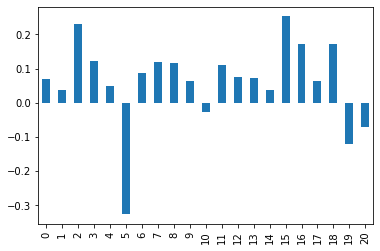

In [50]:
(pd.Series(returns)-1).plot(kind = 'bar')